# Data Analytics (Data Visualiazation)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("./CSV Files/da.csv")

In [4]:
df.head(10)

Sales Person    Geography               Product  Amount  Units  \
0      Ram Mahesh  New Zealand        70% Dark Bites  $1,624    114   
1     Brien Boise          USA  Choco Coated Almonds  $6,706    459   
2    Husein Augar          USA          Almond Choco    $959    147   
3    Carla Molina       Canada         Drinking Coco  $9,632    288   
4  Curtice Advani           UK            White Choc  $2,100    414   
5      Ram Mahesh          USA   Peanut Butter Cubes  $8,869    432   
6  Curtice Advani    Australia    Smooth Sliky Salty  $2,681     54   
7     Brien Boise          USA           After Nines  $5,012    210   
8    Ches Bonnell    Australia        50% Dark Bites  $1,281     75   
9    Gigi Bohling  New Zealand        50% Dark Bites  $4,991     12   

   Amount in Number  
0              1624  
1              6706  
2               959  
3              9632  
4              2100  
5              8869  
6              2681  
7              5012  
8              1281  
9              4991

# Analyse and Visualize Total Units and Sales Per Geography

In [17]:
geography = list(df["Geography"].unique())
geography

['New Zealand', 'USA', 'Canada', 'UK', 'Australia', 'India']

In [20]:
geography_sum = list()
for state in geography:
    state = df[df["Geography"] == state]
    state_sum = state['Units'].sum()
    geography_sum.append(state_sum)
    
geography_sum

[7431, 10158, 7302, 5745, 6264, 8760]

In [23]:
# total sold in a state
dic = {'State':geography,"Units":geography_sum}
dic

{'State': ['New Zealand', 'USA', 'Canada', 'UK', 'Australia', 'India'],
 'Units': [7431, 10158, 7302, 5745, 6264, 8760]}

In [24]:
# total sold in a state
state_units = pd.DataFrame(dic,index=geography)

In [25]:
state_units

State  Units
New Zealand  New Zealand   7431
USA                  USA  10158
Canada            Canada   7302
UK                    UK   5745
Australia      Australia   6264
India              India   8760

([<matplotlib.patches.Wedge at 0x19acde28670>,
 [Text(1.0465410397355315, 0.5871557307471954, 'New Zealand'),
  Text(-0.18013355483648846, 1.1864029258316797, 'USA'),
  Text(-1.171391158339165, 0.26046641657770275, 'Canada'),
  Text(-0.9339246255541611, -0.7535149592300873, 'UK'),
  Text(-0.07871031243540601, -1.1974158370074788, 'Australia'),
  Text(0.9885537576177497, -0.6802657335922687, 'India')],
 [Text(0.6104822731790599, 0.3425075096025306, '16%'),
  Text(-0.1050779069879516, 0.692068373401813, '22%'),
  Text(-0.6833115090311795, 0.15193874300365992, '15%'),
  Text(-0.5447893649065939, -0.4395503928842175, '12%'),
  Text(-0.045914348920653505, -0.6984925715876958, '13%'),
  Text(0.5766563586103539, -0.3968216779288234, '19%')])

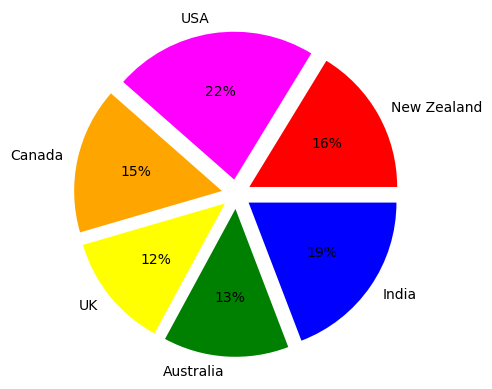

In [67]:
clrs = ['red','fuchsia','orange','yellow','green','blue']
plt.pie(state_units['Units'],labels = state_units['State'],autopct='%i%%',colors=clrs,explode=[0.1,0.1,0.1,0.1,0.1,0.1])

In [37]:
# Sales per Geography
geography_sales_sum = list()
for state in geography:
    state = df[df["Geography"] == state]
    state_sales_sum = state['Amount in Number'].sum()
    geography_sales_sum.append(state_sales_sum)
    
geography_sales_sum

[218813, 189434, 237944, 173530, 168679, 252469]

In [39]:
# Store into Dataset

In [40]:
state_units['Amount'] = geography_sales_sum

In [41]:
state_units

State  Units  Amount
New Zealand  New Zealand   7431  218813
USA                  USA  10158  189434
Canada            Canada   7302  237944
UK                    UK   5745  173530
Australia      Australia   6264  168679
India              India   8760  252469

([<matplotlib.patches.Wedge at 0x19acde8c730>,
 [Text(1.0205225708089762, 0.6312952419188965, 'New Zealand'),
  Text(-0.020128172147309907, 1.199831178410533, 'USA'),
  Text(-1.0687928494379404, 0.545602277295768, 'Canada'),
  Text(-1.0104386682029447, -0.6473126739067138, 'UK'),
  Text(-0.16108709056176812, -1.1891387426429032, 'Australia'),
  Text(0.9630929485214539, -0.7158575085226475, 'India')],
 [Text(0.5953048329719028, 0.368255557786023, '17%'),
  Text(-0.011741433752597443, 0.6999015207394775, '15%'),
  Text(-0.6234624955054653, 0.318267995089198, '19%'),
  Text(-0.5894225564517177, -0.3775990597789163, '13%'),
  Text(-0.09396746949436473, -0.6936642665416936, '13%'),
  Text(0.5618042199708481, -0.417583546638211, '20%')])

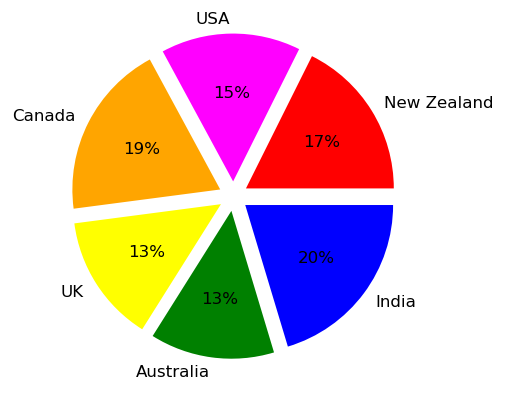

In [68]:
clrs = ['red','fuchsia','orange','yellow','green','blue']
plt.figure(figsize=(10,4),dpi=120)
plt.pie(state_units['Amount'],labels = state_units['State'],autopct='%i%%',colors=clrs,explode=[0.1,0.1,0.1,0.1,0.1,0.1])

# Mark Or Notify the geograpgy selleing units and amount less than average

In [73]:
average_units = int(state_units['Units'].mean())
average_units

average_amount = int(state_units['Amount'].mean())
average_amount

206811

## Applying Hatch to geography that have amount < avarage

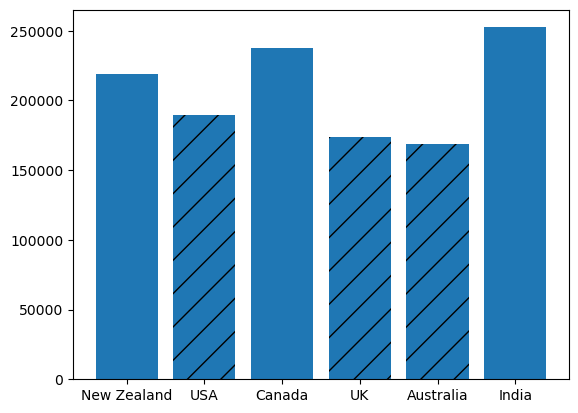

In [153]:
amount_bar = plt.bar(state_units['State'],state_units['Amount'])
a = 0
data = True
for state in state_units["State"]:
    data = pd.DataFrame(state_units['Amount']<average_amount)
    
for am in data["Amount"]:
    if(am == True):
        amount_bar[a].set_hatch("/")
    a+=1

## Applying Hatch to geography that have unit < avarage

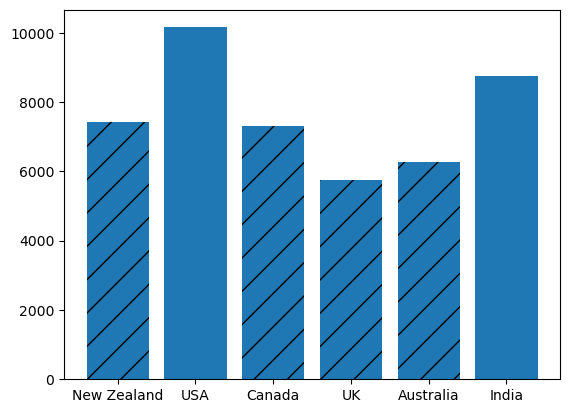

In [154]:
unit_bar = plt.bar(state_units['State'],state_units['Units'])
a = 0
data = True
for state in state_units["Units"]:
    data = pd.DataFrame(state_units['Units']<average_units)
    
for am in data["Units"]:
    if(am == True):
        unit_bar[a].set_hatch("/")
    a+=1

## Analyse the data productwise

In [167]:
products = list(df['Product'].unique())
product_total_amount=list()
product_units = list()
for pr in products:
    data = df[df["Product"] == pr]
    product_total_amount.append(data['Amount in Number'].sum())
    product_units.append(data["Units"].sum())
dic = {'Products':products,'Amount':product_total_amount,'Units':product_units}
product_data = pd.DataFrame(dic,index=products)
product_data

Products  Amount  Units
70% Dark Bites              70% Dark Bites   66500   2802
Choco Coated Almonds  Choco Coated Almonds   71967   2301
Almond Choco                  Almond Choco   33551   1566
Drinking Coco                Drinking Coco   52150   1752
White Choc                      White Choc   57372   2106
Peanut Butter Cubes    Peanut Butter Cubes   69160   1854
Smooth Sliky Salty      Smooth Sliky Salty   39263   1683
After Nines                    After Nines   66283   2052
50% Dark Bites              50% Dark Bites   43183   2022
Eclairs                            Eclairs   63721   2331
Mint Chip Choco            Mint Chip Choco   62111   2154
Milk Bars                        Milk Bars   47271   1881
Manuka Honey Choco      Manuka Honey Choco   58009   2976
Orange Choco                  Orange Choco   54712   2196
Fruit & Nut Bars          Fruit & Nut Bars   56644   1812
99% Dark & Pure            99% Dark & Pure   44744   1956
Raspberry Choco            Raspberry Choco   68971   1533
85% Dark Bars                85% Dark Bars   35378   1044
Organic Choco Syrup    Organic Choco Syrup   69461   2982
Caramel Stuffed Bars  Caramel Stuffed Bars   72373   3207
Spicy Special Slims    Spicy Special Slims   37772   1308
Baker's Choco Chips    Baker's Choco Chips   70273   2142

In [170]:
product_data['Amount Per Unit'] = product_data['Amount'] // product_data['Units']
product_data

Products  Amount  Units  Amount Per Unit
70% Dark Bites              70% Dark Bites   66500   2802               23
Choco Coated Almonds  Choco Coated Almonds   71967   2301               31
Almond Choco                  Almond Choco   33551   1566               21
Drinking Coco                Drinking Coco   52150   1752               29
White Choc                      White Choc   57372   2106               27
Peanut Butter Cubes    Peanut Butter Cubes   69160   1854               37
Smooth Sliky Salty      Smooth Sliky Salty   39263   1683               23
After Nines                    After Nines   66283   2052               32
50% Dark Bites              50% Dark Bites   43183   2022               21
Eclairs                            Eclairs   63721   2331               27
Mint Chip Choco            Mint Chip Choco   62111   2154               28
Milk Bars                        Milk Bars   47271   1881               25
Manuka Honey Choco      Manuka Honey Choco   58009   2976               19
Orange Choco                  Orange Choco   54712   2196               24
Fruit & Nut Bars          Fruit & Nut Bars   56644   1812               31
99% Dark & Pure            99% Dark & Pure   44744   1956               22
Raspberry Choco            Raspberry Choco   68971   1533               44
85% Dark Bars                85% Dark Bars   35378   1044               33
Organic Choco Syrup    Organic Choco Syrup   69461   2982               23
Caramel Stuffed Bars  Caramel Stuffed Bars   72373   3207               22
Spicy Special Slims    Spicy Special Slims   37772   1308               28
Baker's Choco Chips    Baker's Choco Chips   70273   2142               32

Products  Amount  Units  Amount Per Unit
Choco Coated Almonds  Choco Coated Almonds   71967   2301               31
Drinking Coco                Drinking Coco   52150   1752               29
Peanut Butter Cubes    Peanut Butter Cubes   69160   1854               37
After Nines                    After Nines   66283   2052               32
Mint Chip Choco            Mint Chip Choco   62111   2154               28
Fruit & Nut Bars          Fruit & Nut Bars   56644   1812               31
Raspberry Choco            Raspberry Choco   68971   1533               44
85% Dark Bars                85% Dark Bars   35378   1044               33
Spicy Special Slims    Spicy Special Slims   37772   1308               28
Baker's Choco Chips    Baker's Choco Chips   70273   2142               32

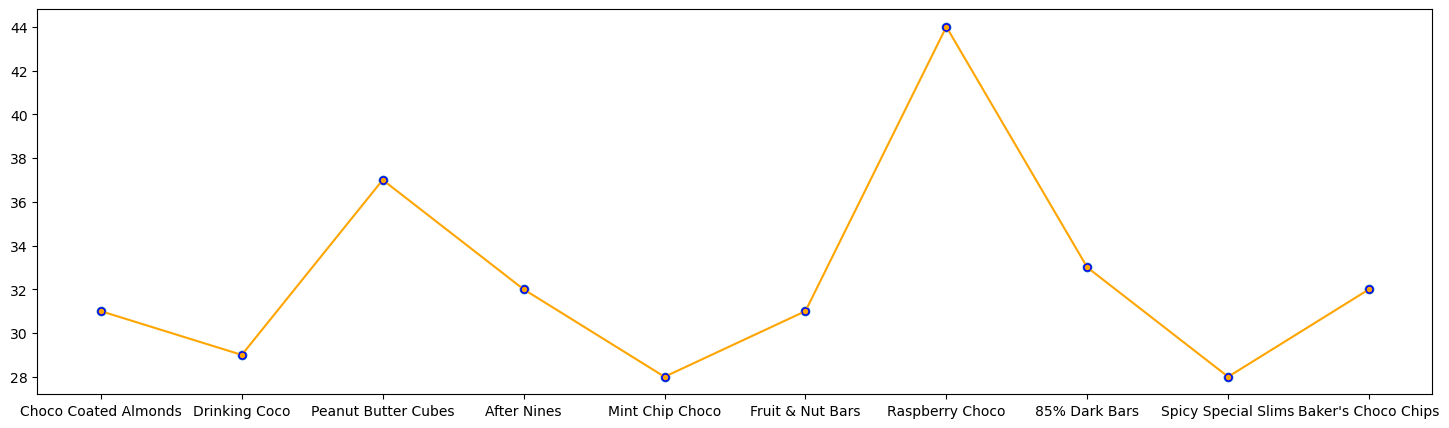

In [228]:
plt.figure(figsize=(18,5))
average = product_data['Amount Per Unit'].mean()
above_average = product_data[product_data["Amount Per Unit"]>average]
plt.plot(above_average['Products'],above_average['Amount Per Unit'],c='orange',marker='o',markersize=5,markeredgecolor='blue')
plt.scatter(above_average['Products'],above_average['Amount Per Unit'])
above_average